<font color="green">**K-Nearest Neighbors model for stock prediction using stock data and News Vectors**</font>

**Import Libraries**

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd

#Data Scaling Libraries
from sklearn.preprocessing import MinMaxScaler

#Error Metrics Libraries
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#KNN Libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

##SAE Libraries
from keras.layers import Input, Dense
from keras.models import Model

#Data Visualization Library
plt.style.use('fivethirtyeight')

In [2]:
# this is the size of our encoded representations
encoding_dim = 50  # 50 floats

# this is our input placeholder
input_img = Input(shape=(300,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(300, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [3]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [4]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
#configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

**Read Data**

In [6]:
newsVectors = pd.read_csv('vectorAMD.csv')
newsVectors.head(1)

,date,news,vectors,vec0,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,vec10,vec11,vec12,vec13,vec14,vec15,vec16,vec17,vec18,vec19,vec20,vec21,vec22,vec23,vec24,vec25,vec26,vec27,vec28,vec29,vec30,vec31,vec32,vec33,vec34,vec35,vec36,...,vec260,vec261,vec262,vec263,vec264,vec265,vec266,vec267,vec268,vec269,vec270,vec271,vec272,vec273,vec274,vec275,vec276,vec277,vec278,vec279,vec280,vec281,vec282,vec283,vec284,vec285,vec286,vec287,vec288,vec289,vec290,vec291,vec292,vec293,vec294,vec295,vec296,vec297,vec298,vec299
0,2020-05-26,BLICKNovartisAugenarznei Beovu kommt künftig a...,[ 5.07812500e-02 -3.95329781e-02 1.02132158e-...,0.050781,-0.039533,0.010213,-0.075195,-0.038859,0.104736,0.194661,-0.18689,-0.004395,0.226562,-0.172363,-0.138631,-0.053874,-0.110758,-0.088399,-0.058268,0.079976,0.237467,-0.072428,0.016398,-0.08724,0.154297,0.150391,0.095378,-0.157715,-0.1132,-0.075765,0.18457,-0.131673,-0.199056,0.144531,-0.018026,-0.070312,-0.266602,-0.110677,-0.177897,-0.033723,...,0.059896,0.205729,0.191081,-0.02596,-0.053304,0.165365,0.037242,-0.040446,-0.010254,0.027181,0.030843,-0.072266,-0.121501,0.011556,0.185465,0.033366,-0.189453,0.184408,-0.291016,0.193522,-0.128255,0.064046,0.050374,0.033203,-0.097377,0.129021,0.144938,-0.028564,-0.152262,0.011149,-0.065104,-0.025411,-0.240885,0.204753,-0.058431,-0.01237,-0.157552,0.032389,0.049072,0.152181


In [7]:
vectors = newsVectors.iloc[:,3:]

In [8]:
vectors.head(2)

,vec0,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,vec10,vec11,vec12,vec13,vec14,vec15,vec16,vec17,vec18,vec19,vec20,vec21,vec22,vec23,vec24,vec25,vec26,vec27,vec28,vec29,vec30,vec31,vec32,vec33,vec34,vec35,vec36,vec37,vec38,vec39,...,vec260,vec261,vec262,vec263,vec264,vec265,vec266,vec267,vec268,vec269,vec270,vec271,vec272,vec273,vec274,vec275,vec276,vec277,vec278,vec279,vec280,vec281,vec282,vec283,vec284,vec285,vec286,vec287,vec288,vec289,vec290,vec291,vec292,vec293,vec294,vec295,vec296,vec297,vec298,vec299
0,0.050781,-0.039533,0.010213,-0.075195,-0.038859,0.104736,0.194661,-0.186890,-0.004395,0.226562,-0.172363,-0.138631,-0.053874,-0.110758,-0.088399,-0.058268,0.079976,0.237467,-0.072428,0.016398,-0.08724,0.154297,0.150391,0.095378,-0.157715,-0.113200,-0.075765,0.18457,-0.131673,-0.199056,0.144531,-0.018026,-0.070312,-0.266602,-0.110677,-0.177897,-0.033723,0.250651,0.053874,0.031413,...,0.059896,0.205729,0.191081,-0.025960,-0.053304,0.165365,0.037242,-0.040446,-0.010254,0.027181,0.030843,-0.072266,-0.121501,0.011556,0.185465,0.033366,-0.189453,0.184408,-0.291016,0.193522,-0.128255,0.064046,0.050374,0.033203,-0.097377,0.129021,0.144938,-0.028564,-0.152262,0.011149,-0.065104,-0.025411,-0.240885,0.204753,-0.058431,-0.012370,-0.157552,0.032389,0.049072,0.152181
1,-0.003174,0.051782,-0.000952,-0.041371,0.044580,-0.038391,-0.029260,-0.202637,0.105780,0.057080,0.004889,-0.091910,0.007547,0.161700,-0.099097,0.063708,0.009985,0.104175,0.017120,0.007758,0.07345,-0.041113,0.013174,-0.018564,0.076413,-0.085272,0.001062,-0.03020,-0.016718,0.037366,-0.003046,-0.101477,-0.018640,0.046960,-0.036743,-0.037891,-0.011987,-0.100262,0.041248,0.028674,...,0.106567,0.027048,0.079728,0.096387,0.063635,0.088950,-0.097095,-0.006531,-0.148611,0.047131,-0.107397,-0.072119,0.014468,-0.069873,0.025391,-0.083803,-0.066479,-0.043561,0.008105,0.067792,-0.049259,0.059497,-0.057251,-0.009552,0.018744,-0.035931,-0.017302,0.041388,-0.058539,-0.058434,-0.064038,0.020288,-0.015991,0.041321,0.051868,0.066577,-0.041785,-0.011420,0.010396,0.005371


In [9]:
#Converting the dataframe to a numpy array
vectors_nparr = vectors.values

In [10]:
autoencoder.fit(vectors_nparr, vectors_nparr,
                epochs=200,
                batch_size=256,
                shuffle=True,
               )

Epoch 1/200
2/2 [==============================] - 0s 4ms/step - loss: 0.6931
Epoch 2/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6931
Epoch 3/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6931
Epoch 4/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6931
Epoch 5/200
2/2 [==============================] - 0s 4ms/step - loss: 0.6931
Epoch 6/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6931
Epoch 7/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6931
Epoch 8/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6931
Epoch 9/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6931
Epoch 10/200
2/2 [==============================] - 0s 5ms/step - loss: 0.6931
Epoch 11/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6931
Epoch 12/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6931
Epoch 13/200
2/2 [==============================] - 0s 3ms/st

In [11]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_data = encoder.predict(vectors_nparr)
decoded_data = decoder.predict(encoded_data)

In [12]:
encoded_data

array([[0.12298962, 0.        , 0.19708475, ..., 0.20956124, 0.08865872,
        0.        ],
       [0.        , 0.04113997, 0.01211577, ..., 0.18172061, 0.02055573,
        0.17353766],
       [0.14571619, 0.21896608, 0.11451839, ..., 0.16614343, 0.        ,
        0.        ],
       ...,
       [0.        , 0.03537966, 0.07297186, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.18190609, ..., 0.06872714, 0.20935827,
        0.07002942],
       [0.        , 0.0621191 , 0.07721774, ..., 0.        , 0.        ,
        0.07174383]], dtype=float32)

In [13]:
decoded_data

array([[0.51349956, 0.5055186 , 0.49002314, ..., 0.4993016 , 0.49218524,
        0.49549198],
       [0.5013861 , 0.49247584, 0.49264225, ..., 0.5008619 , 0.49086612,
        0.49587378],
       [0.49961987, 0.530982  , 0.47719517, ..., 0.4989813 , 0.5087365 ,
        0.52227235],
       ...,
       [0.49767193, 0.50404125, 0.48947665, ..., 0.5095419 , 0.5010981 ,
        0.5184295 ],
       [0.4970627 , 0.5014171 , 0.50624347, ..., 0.50383747, 0.49412477,
        0.49709892],
       [0.49649656, 0.51171607, 0.4755114 , ..., 0.5093659 , 0.49696234,
        0.5029994 ]], dtype=float32)

In [14]:
vectors_nparr

array([[ 0.05078125, -0.03953298,  0.01021322, ...,  0.03238932,
         0.04907227,  0.15218098],
       [-0.00317383,  0.05178223, -0.00095215, ..., -0.01141968,
         0.01039581,  0.00537109],
       [-0.14314778, -0.0814209 , -0.05436198, ...,  0.05853271,
         0.18823242, -0.09975179],
       ...,
       [ 0.11802979,  0.02709961, -0.01370697, ..., -0.04772949,
         0.04003906,  0.04770508],
       [-0.00675456,  0.04950969, -0.00374349, ..., -0.11477661,
        -0.04498291, -0.0061849 ],
       [-0.07162476,  0.01287406, -0.04348101, ...,  0.00108119,
        -0.08231027, -0.03890991]])

In [15]:
encoded_vec = pd.DataFrame(data=encoded_data)

In [16]:
encoded_vec = encoded_vec.add_prefix('vec')

In [17]:
encoded_vec['date'] = pd.Series(newsVectors['date'])

In [18]:
encoded_vec = encoded_vec[['date', 'vec0', 'vec1', 'vec2','vec3', 'vec4', 'vec5','vec6', 'vec7', 'vec8','vec9', 'vec10', 'vec11','vec12', 'vec13', 'vec14','vec15', 'vec16', 'vec17','vec18', 'vec19', 'vec20','vec21', 'vec22','vec23', 'vec24', 'vec25','vec26', 'vec27', 'vec28','vec29', 'vec30','vec31', 'vec32','vec33', 'vec34', 'vec35','vec36', 'vec37', 'vec38','vec39', 'vec40','vec41', 'vec42','vec43', 'vec44', 'vec45','vec46', 'vec47', 'vec48','vec49']]

In [19]:
encoded_vec.head(2)

,date,vec0,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,vec10,vec11,vec12,vec13,vec14,vec15,vec16,vec17,vec18,vec19,vec20,vec21,vec22,vec23,vec24,vec25,vec26,vec27,vec28,vec29,vec30,vec31,vec32,vec33,vec34,vec35,vec36,vec37,vec38,vec39,vec40,vec41,vec42,vec43,vec44,vec45,vec46,vec47,vec48,vec49
0,2020-05-26,0.12299,0.00000,0.197085,0.121323,0.236132,0.000000,0.090977,0.0,0.181368,0.0,0.083056,0.070984,0.0,0.407401,0.299615,0.178776,0.141603,0.000000,0.101506,0.179725,0.016669,0.206392,0.000000,0.204854,0.008675,0.000000,0.047475,0.000000,0.110409,0.149076,0.0,0.0,0.14518,0.0,0.042089,0.395619,0.170741,0.053690,0.0,0.000000,0.128126,0.000000,0.0,0.196951,0.000000,0.0,0.067468,0.209561,0.088659,0.000000
1,2020-05-19,0.00000,0.04114,0.012116,0.000000,0.000000,0.034385,0.051328,0.0,0.116927,0.0,0.018477,0.003574,0.0,0.000000,0.018314,0.025777,0.000000,0.024442,0.000000,0.000000,0.000000,0.000000,0.164459,0.000000,0.070349,0.013098,0.082352,0.043514,0.125941,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.001710,0.000000,0.167515,0.0,0.044053,0.028837,0.022141,0.0,0.027994,0.044351,0.0,0.000000,0.181721,0.020556,0.173538


In [20]:
# encoded_vec.to_csv('encoded_vec_dis.csv')

In [21]:
# encoded_vec = pd.read_csv('encoded_vec_dis.csv')

**Read Stocks**

In [22]:
#Get the stock quote 
df = web.DataReader('DIS', data_source='yahoo', start='2017-01-01', end='2020-06-08') 
df=df.reset_index()

In [23]:
df.rename(columns={"Date":"date"},inplace=True)
df.head(5)

,date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,106.900002,105.209999,105.300003,106.080002,8884300.0,101.584358
1,2017-01-04,107.500000,106.250000,106.639999,107.440002,8322000.0,102.886719
2,2017-01-05,107.620003,106.790001,107.169998,107.379997,6303000.0,102.829262
3,2017-01-06,109.349998,107.750000,108.019997,108.980003,9551300.0,104.361458
4,2017-01-09,108.830002,108.110001,108.580002,108.360001,6195200.0,103.767731


In [24]:
encoded_vec['date'] = pd.to_datetime(encoded_vec['date'])
encoded_vec['date'] = encoded_vec['date'].dt.date
grouped=encoded_vec.groupby('date').sum()
grouped=grouped.reset_index()
grouped.head(5)

,date,vec0,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,vec10,vec11,vec12,vec13,vec14,vec15,vec16,vec17,vec18,vec19,vec20,vec21,vec22,vec23,vec24,vec25,vec26,vec27,vec28,vec29,vec30,vec31,vec32,vec33,vec34,vec35,vec36,vec37,vec38,vec39,vec40,vec41,vec42,vec43,vec44,vec45,vec46,vec47,vec48,vec49
0,2016-07-22,0.000000,0.062119,0.259124,0.229910,0.168403,0.278988,0.271338,0.031864,0.000000,0.0,0.000000,0.196661,0.000000,0.044342,0.218821,0.034208,0.000000,0.000000,0.000000,0.063573,0.043592,0.165679,0.162129,0.178148,0.000000,0.00000,0.209111,0.014949,0.000000,0.066510,0.000000,0.000000,0.017652,0.000000,0.039576,0.000000,0.000000,0.073715,0.068553,0.225345,0.110999,0.026558,0.000000,0.047217,0.196261,0.000000,0.023068,0.068727,0.209358,0.141773
1,2016-08-03,0.000000,0.035380,0.072972,0.000000,0.074731,0.000000,0.000000,0.122650,0.020585,0.0,0.000000,0.000000,0.000000,0.025446,0.038486,0.000000,0.000000,0.011322,0.053648,0.000000,0.000000,0.031199,0.251438,0.097683,0.133300,0.00000,0.120215,0.038886,0.000000,0.000000,0.155243,0.009168,0.026097,0.063565,0.133714,0.000000,0.000000,0.145258,0.000000,0.004333,0.010716,0.000000,0.165214,0.027553,0.152500,0.145739,0.102934,0.000000,0.000000,0.000000
2,2016-08-25,0.069488,0.104555,0.031989,0.023931,0.035122,0.291661,0.118057,0.310641,0.000000,0.0,0.318376,0.000000,0.000000,0.001493,0.143379,0.000000,0.000000,0.319309,0.033228,0.000000,0.000000,0.048874,0.027634,0.337848,0.095187,0.00000,0.197415,0.000000,0.000000,0.010606,0.118787,0.065633,0.000000,0.000000,0.318773,0.000000,0.000000,0.262051,0.264319,0.055164,0.000000,0.149332,0.169430,0.064350,0.610393,0.000000,0.137048,0.277232,0.182510,0.000000
3,2016-08-31,0.000000,0.149724,0.000000,0.145731,0.164404,0.000000,0.160578,0.000000,0.095491,0.0,0.050528,0.000000,0.000000,0.099315,0.007178,0.000000,0.066095,0.020256,0.021980,0.090706,0.000000,0.018546,0.000000,0.115717,0.034193,0.00078,0.082397,0.000000,0.000000,0.042586,0.000000,0.000000,0.019112,0.000000,0.125026,0.138718,0.000000,0.033304,0.073714,0.000000,0.000000,0.115008,0.135517,0.047691,0.182684,0.000000,0.000000,0.029626,0.024566,0.000000
4,2016-09-06,0.000000,0.072815,0.008593,0.000000,0.000000,0.058388,0.027200,0.046494,0.136617,0.0,0.108664,0.093673,0.110455,0.000000,0.165430,0.000000,0.000000,0.000000,0.090773,0.000000,0.000000,0.020316,0.000000,0.059786,0.025796,0.00000,0.111193,0.000000,0.038579,0.021656,0.000000,0.025471,0.097333,0.000000,0.012700,0.069695,0.027568,0.094380,0.011767,0.131230,0.000000,0.000000,0.000000,0.000000,0.187092,0.000000,0.092639,0.223902,0.071157,0.000000


In [25]:
r = pd.date_range(start=grouped.date.min(), end=grouped.date.max())
grouped=grouped.set_index('date').reindex(r).rename_axis('date')
grouped=grouped.ffill(axis=0)
grouped.head(3)

,vec0,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,vec10,vec11,vec12,vec13,vec14,vec15,vec16,vec17,vec18,vec19,vec20,vec21,vec22,vec23,vec24,vec25,vec26,vec27,vec28,vec29,vec30,vec31,vec32,vec33,vec34,vec35,vec36,vec37,vec38,vec39,vec40,vec41,vec42,vec43,vec44,vec45,vec46,vec47,vec48,vec49
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07-22,0.0,0.062119,0.259124,0.22991,0.168403,0.278988,0.271338,0.031864,0.0,0.0,0.0,0.196661,0.0,0.044342,0.218821,0.034208,0.0,0.0,0.0,0.063573,0.043592,0.165679,0.162129,0.178148,0.0,0.0,0.209111,0.014949,0.0,0.06651,0.0,0.0,0.017652,0.0,0.039576,0.0,0.0,0.073715,0.068553,0.225345,0.110999,0.026558,0.0,0.047217,0.196261,0.0,0.023068,0.068727,0.209358,0.141773
2016-07-23,0.0,0.062119,0.259124,0.22991,0.168403,0.278988,0.271338,0.031864,0.0,0.0,0.0,0.196661,0.0,0.044342,0.218821,0.034208,0.0,0.0,0.0,0.063573,0.043592,0.165679,0.162129,0.178148,0.0,0.0,0.209111,0.014949,0.0,0.06651,0.0,0.0,0.017652,0.0,0.039576,0.0,0.0,0.073715,0.068553,0.225345,0.110999,0.026558,0.0,0.047217,0.196261,0.0,0.023068,0.068727,0.209358,0.141773
2016-07-24,0.0,0.062119,0.259124,0.22991,0.168403,0.278988,0.271338,0.031864,0.0,0.0,0.0,0.196661,0.0,0.044342,0.218821,0.034208,0.0,0.0,0.0,0.063573,0.043592,0.165679,0.162129,0.178148,0.0,0.0,0.209111,0.014949,0.0,0.06651,0.0,0.0,0.017652,0.0,0.039576,0.0,0.0,0.073715,0.068553,0.225345,0.110999,0.026558,0.0,0.047217,0.196261,0.0,0.023068,0.068727,0.209358,0.141773


In [26]:
merged_data = pd.merge(left=df, right=grouped, left_on='date', right_on='date') #merge datasets
# merged_data.drop(['date'], axis=1,inplace=True) #remove redundant column
merged_data.head(3)

,date,High,Low,Open,Close,Volume,Adj Close,vec0,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,vec10,vec11,vec12,vec13,vec14,vec15,vec16,vec17,vec18,vec19,vec20,vec21,vec22,vec23,vec24,vec25,vec26,vec27,vec28,vec29,vec30,vec31,vec32,vec33,vec34,vec35,vec36,vec37,vec38,vec39,vec40,vec41,vec42,vec43,vec44,vec45,vec46,vec47,vec48,vec49
0,2017-01-03,106.900002,105.209999,105.300003,106.080002,8884300.0,101.584358,0.0,0.047073,0.240899,0.026678,0.290948,0.502885,0.353561,0.016923,0.112997,0.0,0.0,0.210249,0.0,0.0,0.117803,0.0,0.0,0.0,0.0,0.138826,0.137094,0.104933,0.0,0.246367,0.0,0.0,0.182186,0.0,0.0,0.11298,0.0,0.0,0.0,0.0,0.024378,0.0,0.0,0.416296,0.221785,0.313625,0.207941,0.039286,0.134438,0.115316,0.041055,0.0,0.01127,0.11252,0.142444,0.108268
1,2017-01-04,107.500000,106.250000,106.639999,107.440002,8322000.0,102.886719,0.0,0.047073,0.240899,0.026678,0.290948,0.502885,0.353561,0.016923,0.112997,0.0,0.0,0.210249,0.0,0.0,0.117803,0.0,0.0,0.0,0.0,0.138826,0.137094,0.104933,0.0,0.246367,0.0,0.0,0.182186,0.0,0.0,0.11298,0.0,0.0,0.0,0.0,0.024378,0.0,0.0,0.416296,0.221785,0.313625,0.207941,0.039286,0.134438,0.115316,0.041055,0.0,0.01127,0.11252,0.142444,0.108268
2,2017-01-05,107.620003,106.790001,107.169998,107.379997,6303000.0,102.829262,0.0,0.047073,0.240899,0.026678,0.290948,0.502885,0.353561,0.016923,0.112997,0.0,0.0,0.210249,0.0,0.0,0.117803,0.0,0.0,0.0,0.0,0.138826,0.137094,0.104933,0.0,0.246367,0.0,0.0,0.182186,0.0,0.0,0.11298,0.0,0.0,0.0,0.0,0.024378,0.0,0.0,0.416296,0.221785,0.313625,0.207941,0.039286,0.134438,0.115316,0.041055,0.0,0.01127,0.11252,0.142444,0.108268


In [27]:
merged_data=merged_data.set_index('date')
merged_data.head(3)

,High,Low,Open,Close,Volume,Adj Close,vec0,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,vec10,vec11,vec12,vec13,vec14,vec15,vec16,vec17,vec18,vec19,vec20,vec21,vec22,vec23,vec24,vec25,vec26,vec27,vec28,vec29,vec30,vec31,vec32,vec33,vec34,vec35,vec36,vec37,vec38,vec39,vec40,vec41,vec42,vec43,vec44,vec45,vec46,vec47,vec48,vec49
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,106.900002,105.209999,105.300003,106.080002,8884300.0,101.584358,0.0,0.047073,0.240899,0.026678,0.290948,0.502885,0.353561,0.016923,0.112997,0.0,0.0,0.210249,0.0,0.0,0.117803,0.0,0.0,0.0,0.0,0.138826,0.137094,0.104933,0.0,0.246367,0.0,0.0,0.182186,0.0,0.0,0.11298,0.0,0.0,0.0,0.0,0.024378,0.0,0.0,0.416296,0.221785,0.313625,0.207941,0.039286,0.134438,0.115316,0.041055,0.0,0.01127,0.11252,0.142444,0.108268
2017-01-04,107.500000,106.250000,106.639999,107.440002,8322000.0,102.886719,0.0,0.047073,0.240899,0.026678,0.290948,0.502885,0.353561,0.016923,0.112997,0.0,0.0,0.210249,0.0,0.0,0.117803,0.0,0.0,0.0,0.0,0.138826,0.137094,0.104933,0.0,0.246367,0.0,0.0,0.182186,0.0,0.0,0.11298,0.0,0.0,0.0,0.0,0.024378,0.0,0.0,0.416296,0.221785,0.313625,0.207941,0.039286,0.134438,0.115316,0.041055,0.0,0.01127,0.11252,0.142444,0.108268
2017-01-05,107.620003,106.790001,107.169998,107.379997,6303000.0,102.829262,0.0,0.047073,0.240899,0.026678,0.290948,0.502885,0.353561,0.016923,0.112997,0.0,0.0,0.210249,0.0,0.0,0.117803,0.0,0.0,0.0,0.0,0.138826,0.137094,0.104933,0.0,0.246367,0.0,0.0,0.182186,0.0,0.0,0.11298,0.0,0.0,0.0,0.0,0.024378,0.0,0.0,0.416296,0.221785,0.313625,0.207941,0.039286,0.134438,0.115316,0.041055,0.0,0.01127,0.11252,0.142444,0.108268


In [28]:
data = merged_data.filter(['Close','vec0','vec1','vec3', 'vec4', 'vec5','vec6', 'vec7', 'vec8','vec9', 'vec10', 'vec11','vec12', 'vec13', 'vec14','vec15', 'vec16', 'vec17','vec18', 'vec19', 'vec20','vec21', 'vec22','vec23', 'vec24', 'vec25','vec26', 'vec27', 'vec28','vec29', 'vec30','vec31', 'vec32','vec33', 'vec34', 'vec35','vec36', 'vec37', 'vec38','vec39', 'vec40','vec41', 'vec42','vec43', 'vec44', 'vec45','vec46', 'vec47', 'vec48','vec49'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)

In [29]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [30]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,:])
  y_train.append(dataset[i,0])

In [31]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [32]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]

#Create the x_test and y_test data sets
x_test = []
y_test =  df['Close'][training_data_len :]
# y_test =  dataset[training_data_len : , : ] 
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,:])

In [33]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

**KNN: Build model and train using the training datat**

In [34]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[1,2,3,4,5]}
knn = neighbors.KNeighborsRegressor(n_neighbors=5)  ## Neighbors with size 1,5,20 is tested with 5 as the optimal performer
model = GridSearchCV(knn, params, cv=10)

nsamples, nx, ny = x_train.shape
x_train = x_train.reshape((nsamples,nx*ny))

#fit the model on training data
model.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

**Predict on testing data and visualize predictions**

In [35]:
nsamples_test, nx_test, ny_test = x_test.shape
x_test = x_test.reshape((nsamples_test,nx_test*ny_test))

In [36]:
preds = model.predict(x_test)
preds = preds.reshape(-1,1)
# preds = scaler.inverse_transform(preds)#Undo scaling

rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
print("RMS: ",rms)

RMS:  24.044108080292695


In [37]:
#Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = preds

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


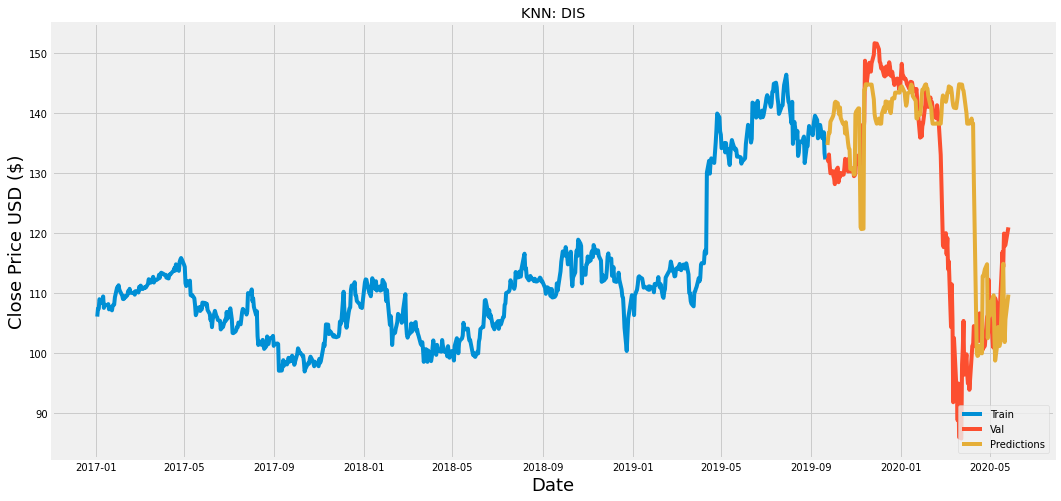

In [38]:
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('KNN: DIS')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()